# Importações

In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib

In [2]:
# Importação do banco de dados CSV
dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")

C:\Users\Usuário\AppData\Local\Temp\ipykernel_1288\3544363823.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")


In [3]:
# Listagem das colunas para consulta
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708357 entries, 0 to 1708356
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     object 
 13  paciente_nacionalidade_enumNacionalidade  object 
 14  es

In [20]:
# Criação do dataframe de total de vacinas administradas por fabricantes.

# Calcula a contagem de cada fabricante de vacinas (Total)
dados_fab = pd.DataFrame(dados.vacina_fabricante_nome.value_counts())

# Renomeia as colunas do DataFrame resultante
dados_fab = dados_fab.rename(columns={'vacina_fabricante_nome': 'Total de Vacinas'})

# Reseta o índice do DataFrame para criar uma coluna de fabricantes
dados_fab = dados_fab.reset_index()

# Renomeia a coluna recém-criada para 'Fabricantes'
dados_fab = dados_fab.rename(columns={'index': 'Fabricantes'})
dados_fab

,Fabricantes,Total de Vacinas
0,PFIZER,675743
1,ASTRAZENECA/FIOCRUZ,599125
2,SINOVAC/BUTANTAN,330186
3,JANSSEN,42765
4,Pendente Identificação,19858
5,PFIZER - PEDIÁTRICA,15539
6,PFIZER - PEDI?TRICA,12134
7,ASTRAZENECA,4920
8,Pendente Identifica??o,3965
9,PFIZER - PEDIÁTRICA MENOR DE 5 ANOS,2524


# Tratamento dos dados

In [21]:
# Tratamento dos dados de fabricantes das vacinas

# criar um dataframe com os dados fornecidos
data = {'Fabricantes': ['PFIZER', 'ASTRAZENECA/FIOCRUZ', 'SINOVAC/BUTANTAN', 'JANSSEN', 'Pendente Identificação',
                        'PFIZER - PEDIÁTRICA', 'PFIZER - PEDI?TRICA', 'ASTRAZENECA', 'Pendente Identifica??o',
                        'PFIZER - PEDIÁTRICA MENOR DE 5 ANOS', 'SINOVAC', 'PFIZER MANUFACTURING BELGIUM NV - BELGICA',
                        'FUNDACAO OSWALDO CRUZ'],
        'Total de Vacinas': [675743, 599125, 330186, 42765, 19858, 15539, 12134, 4920, 3965, 2524, 1593, 4, 1]}
df = pd.DataFrame(data)

# criar um dicionário para agrupar as linhas que serão somadas
dict_pfizer = {'PFIZER - PEDIÁTRICA': 'PFIZER_PEDIÁTRICA', 'PFIZER - PEDI?TRICA': 'PFIZER_PEDIÁTRICA', 'PFIZER - PEDIÁTRICA MENOR DE 5 ANOS': 'PFIZER_PEDIÁTRICA'}
dict_pendente = {'Pendente Identificação': 'NÃO_IDENTIFICADO', 'Pendente Identifica??o': 'NÃO_IDENTIFICADO'}
dict_pf = {'PFIZER MANUFACTURING BELGIUM NV - BELGICA': 'PFIZER'}

# substituir os valores do dicionário no dataframe
df = df.replace({'Fabricantes': dict_pfizer})
df = df.replace({'Fabricantes': dict_pendente})
df = df.replace({'Fabricantes': dict_pf})

# agrupar as linhas e somar os valores das vacinas
df_grouped = df.groupby(['Fabricantes'], as_index=False).sum()

# exibir o dataframe agrupado
df_grouped[['Fabricantes']].sort_values('Fabricantes', ascending=False)
df_grouped


,Fabricantes,Total de Vacinas
0,ASTRAZENECA,4920
1,ASTRAZENECA/FIOCRUZ,599125
2,FUNDACAO OSWALDO CRUZ,1
3,JANSSEN,42765
4,NÃO_IDENTIFICADO,23823
5,PFIZER,675747
6,PFIZER_PEDIÁTRICA,30197
7,SINOVAC,1593
8,SINOVAC/BUTANTAN,330186


In [6]:
# Seleção das colunas a serem analisadas neste projeto
dados = dados.loc[:, ['paciente_idade','paciente_enumSexoBiologico','paciente_racaCor_valor','paciente_endereco_nmMunicipio','vacina_categoria_nome','vacina_fabricante_nome','vacina_dataAplicacao','vacina_descricao_dose']]

# Filtro a partir da 1ª dose
dados_1 = dados[dados['vacina_descricao_dose'] == '1ª Dose']

# Filtro 2ª dose
dados_2 = dados[dados['vacina_descricao_dose'] == '2ª Dose']

# Retirando informações duplicadas
dados_1.drop_duplicates(inplace=True)
dados_2.drop_duplicates(inplace=True)

ttt_idade = dados[dados['paciente_idade'] != 221.0]

C:\Users\Usuário\AppData\Local\Temp\ipykernel_1288\4176080866.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_1.drop_duplicates(inplace=True)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_1288\4176080866.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_2.drop_duplicates(inplace=True)


In [7]:
# Juntar nomes iguais de coluna vacina_fabricante_nome 
dados_1.vacina_fabricante_nome.value_counts()

ASTRAZENECA/FIOCRUZ                    134695
SINOVAC/BUTANTAN                       107080
PFIZER                                  83881
Pendente Identificação                   9837
PFIZER - PEDIÁTRICA                      4940
PFIZER - PEDI?TRICA                      4749
ASTRAZENECA                              2981
Pendente Identifica??o                   1689
PFIZER - PEDIÁTRICA MENOR DE 5 ANOS      1665
JANSSEN                                   525
SINOVAC                                   431
Name: vacina_fabricante_nome, dtype: int64

## Quem são as pessoas vacinadas com a 1ª dose (COVID-19) no estado do Amazonas?

<Axes: >

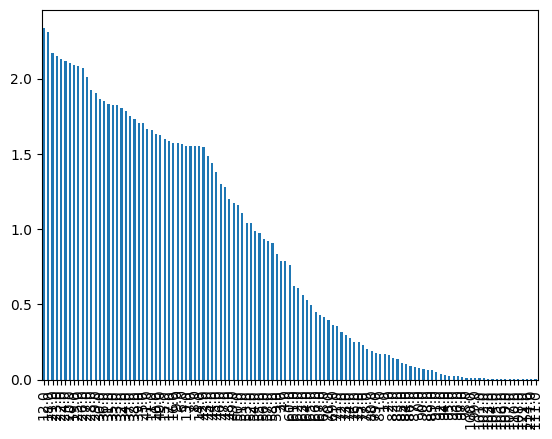

In [8]:
# Quantidade de aplicações de 1ª dose da vacina por Idade, em porcentagem
idade = dados_1.paciente_idade.value_counts()
tt_idade = idade.sum()
porcent_idade = (idade/tt_idade)*100
porcent_idade.plot(kind='bar')

<Axes: title={'center': 'Vacinas 1ª dose por Raça, em porcentagem'}>

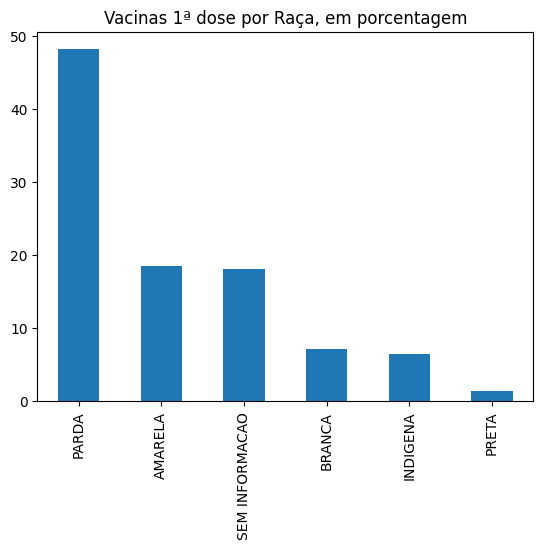

In [9]:
# Quantidade de aplicações de 1ª dose da vacina por Raça, em porcentagem
raça = dados_1.paciente_racaCor_valor.value_counts(normalize=True)
tt_raça = raça.sum()
porcent_raça = (raça/tt_raça)*100
porcent_raça.plot(kind='bar', title='Vacinas 1ª dose por Raça, em porcentagem', ylabel='')

In [10]:
# Quantidade de aplicações de 1ª dose da vacina por sexo, em porcentagem
sexo = dados_1.paciente_enumSexoBiologico.value_counts(normalize=True)
sexo

M    0.505692
F    0.494303
I    0.000006
Name: paciente_enumSexoBiologico, dtype: float64

In [11]:
# Quantidade de aplicações de 1ª dose da vacina por Município, em porcentagem
tt_munic = dados_1.paciente_endereco_nmMunicipio.value_counts()
tt_pac = tt_munic.sum()
porcent_munic = (tt_munic/tt_pac)*100
porcent_munic

MANAUS             29.804995
ITACOATIARA         3.258836
MANACAPURU          3.229713
PARINTINS           2.921188
COARI               2.791722
                     ...    
FERREIROS           0.000288
LAPA                0.000288
RIO FORMOSO         0.000288
CORONEL VIVIDA      0.000288
ANITA GARIBALDI     0.000288
Name: paciente_endereco_nmMunicipio, Length: 2062, dtype: float64

## Problema
Há diferença entre o perfil das pessoas que tomaram a segunda dose no Amazonas?
Qual a distância média entre a casa e o local de aplicação?
 (contabilizar 1 dose e 2 doses e 3 doses)

In [12]:
# Quantidade total de aplicação da 1ª dose da vacina por população de risco, em porcentagem
pop_risco = dados_1.vacina_categoria_nome.value_counts()
tt_cat = pop_risco.sum()
porcent_pop_risco = (pop_risco/tt_cat)*100
porcent_pop_risco = round(porcent_pop_risco, 2)
porcent_pop_risco

Faixa Etária                                       62.64
Povos e Comunidades Tradicionais                   10.12
Trabalhadores de Saúde                              7.47
Povos Indígenas                                     6.44
Comorbidades                                        5.46
Trabalhadores da Educação                           2.99
Gestantes                                           1.07
Forças de Segurança e Salvamento                    0.67
Forças Armadas (membros ativos)                     0.61
Pessoas com Deficiência                             0.59
Trabalhadores de Transporte                         0.46
Puérperas                                           0.38
População Privada de Liberdade                      0.27
Trabalhadores Portuários                            0.22
Outros                                              0.22
Trabalhadores de Limpeza Urbana                     0.15
Funcionário do Sistema de Privação de Liberdade     0.08
Pessoas de 60 anos ou mais inst

In [13]:
# Fabricante de vacina por população de risco (trabalhadores da saúde) 1ª dose
pop_risco = dados_1[(dados_1['vacina_categoria_nome'] != 'Faixa Etária')]
grupo_pop_risco = pop_risco.groupby('vacina_categoria_nome')['vacina_fabricante_nome'].value_counts()
grupo_trab = grupo_pop_risco['Trabalhadores de Saúde']
tt_trab = grupo_pop_risco['Trabalhadores de Saúde'].sum()
porcent_trab = (grupo_trab/tt_trab)*100
porcent_trab = round(porcent_trab, 2)
porcent_trab

vacina_fabricante_nome
SINOVAC/BUTANTAN          62.02
ASTRAZENECA/FIOCRUZ       33.82
PFIZER                     3.86
ASTRAZENECA                0.26
PFIZER - PEDI?TRICA        0.02
JANSSEN                    0.01
Pendente Identificação     0.01
Name: vacina_fabricante_nome, dtype: float64

In [14]:
# Fabricante de vacina por população de risco (comorbidades) 1ª dose
pop_risco = dados_1[(dados_1['vacina_categoria_nome'] != 'Faixa Etária')]
grupo_pop_risco = pop_risco.groupby('vacina_categoria_nome')['vacina_fabricante_nome'].value_counts()
grupo_comorb = grupo_pop_risco['Comorbidades']
tt_comorb = grupo_pop_risco['Comorbidades'].sum()
porcent_comorb = (grupo_comorb/tt_comorb)*100
porcent_comorb = round(porcent_comorb, 2)
porcent_comorb

vacina_fabricante_nome
ASTRAZENECA/FIOCRUZ                    43.46
SINOVAC/BUTANTAN                       41.54
PFIZER                                 11.47
ASTRAZENECA                             2.31
Pendente Identificação                  0.54
Pendente Identifica??o                  0.46
PFIZER - PEDI?TRICA                     0.10
PFIZER - PEDIÁTRICA MENOR DE 5 ANOS     0.05
PFIZER - PEDIÁTRICA                     0.05
JANSSEN                                 0.02
SINOVAC                                 0.01
Name: vacina_fabricante_nome, dtype: float64

In [15]:
# Verificar primeira data de aplicação de vacina e apresentar as populações vacinadas
dados_1['vacina_dataAplicacao'] = pd.to_datetime(dados_1['vacina_dataAplicacao'], format='%Y-%m-%d')
dados_ord = dados_1.groupby(['vacina_dataAplicacao', 'vacina_categoria_nome']).size().reset_index(name='count')
dados_ord = dados_ord.sort_values(by='vacina_dataAplicacao')

C:\Users\Usuário\AppData\Local\Temp\ipykernel_1288\3056700026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_1['vacina_dataAplicacao'] = pd.to_datetime(dados_1['vacina_dataAplicacao'], format='%Y-%m-%d')
